This notebook simulates the roboter

## Setup environment

In [4]:
close all;
clear all;
clc;

cd('../src');

## Load map

In [5]:
map = LoadMap('../Data/Vorgabe_update.png');

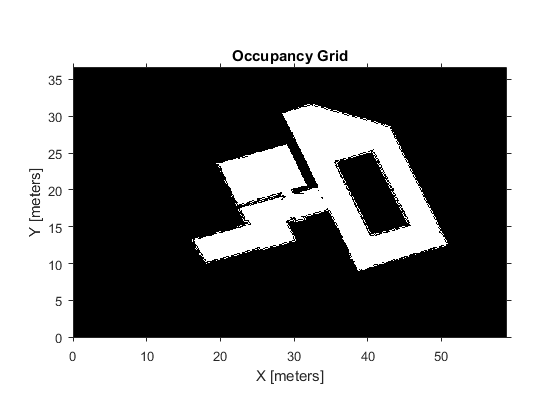

In [6]:
show(map);

##  Create trajectory

In [10]:
waypoints = [41 27;42 26; 47 17; 47 15; 46 14; 42 12; 40 13; 39 14; 33 24;33 27; 34 28;41 27];
t = 0:1:length(waypoints)-1;
l_t=numel(t);
angles = zeros(l_t,1);  %Richtungswinkel

% Calculate Angle
for i=1:l_t
    if i == l_t
        angles(i)=angles(i-1) + 0.002;
    else
        angles(i) = atan2(waypoints(i+1,2) - waypoints(i,2), waypoints(i+1,1) - waypoints(i,1));
    end
end

### Interpolate trajrctory

In [19]:
intervall = 0:0.5:l_t;
xq = interp1(t, waypoints(:,1), intervall, 'line');
yq = interp1(t, waypoints(:,2), intervall, 'line');
aq = interp1(t, angles(:),      intervall, 'line');

angle = [0, pi/6, pi/3, pi/2, 4*pi/6, 5*pi/6, pi];
angle = angle + pi / 2;
aq    = aq + pi / 2;

maxrange = 5;


robotPose =

   NaN   NaN   NaN


robotPose =

   NaN   NaN   NaN




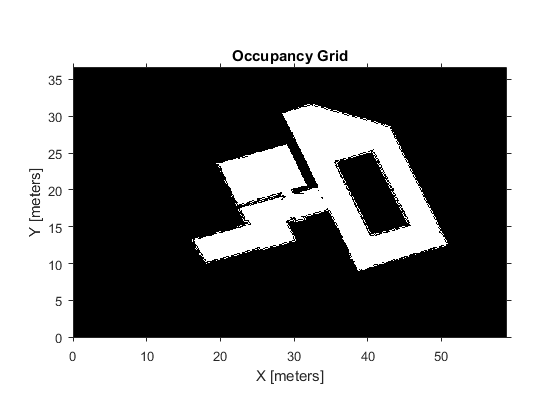

In [37]:
for j = 1 : numel(intervall)
   figure(1);
   show(map)
   hold on
   
   robotPose       = [xq(j), yq(j), aq(j)];
   
   if ~isnan(robotPose(1)) || ~isnan(robotPose(2)) || ~isnan(robotPose(3))
       intersectionPts = rayIntersection(map, robotPose, angle, maxrange);
       direction       = rayIntersection(map, robotPose, -pi/2, 30);   %direction

       plot(robotPose(1), robotPose(2), 'ob') % Robot pose

       for i = 1:size(intersectionPts)
            plot([robotPose(1), intersectionPts(i, 1)],...
                [robotPose(2), intersectionPts(i, 2)], '-bx') % Plot intersecting rays
       end

       plot(xq, yq);
       plot([robotPose(1), direction(1, 1)],...
                [robotPose(2), direction(1, 2)], '-rx') % Plot direction

        pause(1/2);
        hold off
        F(j) = getframe(gcf);
        drawnow
    else
        robotPose       
    end
end

## Store as video

### Create the video writer with 1 fps

In [38]:
writerObj = VideoWriter('../myVideo.mp4', 'MPEG-4');
writerObj.FrameRate = 10; % sets the seconds per image

### Open the video writer

In [39]:
open(writerObj);
for i = 1 : length(F)
    writeVideo(writerObj, F(i));
end
close(writerObj);

<video controls src="../myVideo.mp4" />